In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Try different encodings
encodings = ['latin-1', 'iso-8859-1', 'cp1252', 'utf-16']

for encoding in encodings:
    try:
        print(f"Trying encoding: {encoding}")
        transactions = pd.read_csv('transactions.csv', encoding=encoding)
        customers = pd.read_csv('customers.csv', encoding=encoding)
        countries = pd.read_csv('Country Centroids.csv', encoding=encoding)
        print(f"✓ Success with {encoding}!\n")
        break
    except Exception as e:
        print(f"✗ Failed with {encoding}: {e}\n")
        continue

# Display the data
print("="*60)
print("TRANSACTION DATA")
print("="*60)
print(f"Shape: {transactions.shape}")
print(f"\nFirst 5 rows:")
print(transactions.head())
print(f"\nColumn names:")
print(transactions.columns.tolist())
print(f"\nData types:")
print(transactions.dtypes)

print("\n" + "="*60)
print("CUSTOMER DATA")
print("="*60)
print(f"Shape: {customers.shape}")
print(f"\nFirst 5 rows:")
print(customers.head())
print(f"\nColumn names:")
print(customers.columns.tolist())

print("\n" + "="*60)
print("COUNTRY COORDINATES DATA")
print("="*60)
print(f"Shape: {countries.shape}")
print(f"\nAll rows:")
print(countries.head(20))

Trying encoding: latin-1
✓ Success with latin-1!

TRANSACTION DATA
Shape: (541909, 8)

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', '

In [ ]:
# ============================================================
# STEP 2: DATA QUALITY ASSESSMENT
# ============================================================

print("="*80)
print("DATA QUALITY ASSESSMENT REPORT")
print("="*80)

# ------------------------------------
# TRANSACTION DATA QUALITY CHECKS
# ------------------------------------
print("\n" + "="*60)
print("1. TRANSACTION DATA QUALITY")
print("="*60)

# Check missing values
print("\n[A] Missing Values:")
missing_trans = transactions.isnull().sum()
missing_pct = (missing_trans / len(transactions)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_trans,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicate invoices
print(f"\n[B] Total Transactions: {len(transactions):,}")
print(f"Unique Invoices: {transactions['InvoiceNo'].nunique():,}")

# Check CustomerID issues
print(f"\n[C] CustomerID Issues:")
print(f"Missing CustomerIDs: {transactions['CustomerID'].isnull().sum():,} ({transactions['CustomerID'].isnull().sum()/len(transactions)*100:.2f}%)")
print(f"Unique Customers: {transactions['CustomerID'].nunique():,.0f}")

# Check for negative quantities (returns)
print(f"\n[D] Quantity Analysis:")
print(f"Negative Quantities (Returns): {(transactions['Quantity'] < 0).sum():,}")
print(f"Zero Quantities: {(transactions['Quantity'] == 0).sum():,}")
print(f"Positive Quantities: {(transactions['Quantity'] > 0).sum():,}")

# Check for negative/zero prices
print(f"\n[E] Price Analysis:")
print(f"Negative Prices: {(transactions['UnitPrice'] < 0).sum():,}")
print(f"Zero Prices: {(transactions['UnitPrice'] == 0).sum():,}")
print(f"Price Range: £{transactions['UnitPrice'].min():.2f} to £{transactions['UnitPrice'].max():.2f}")

# Check Country distribution
print(f"\n[F] Country Distribution (Top 10):")
print(transactions['Country'].value_counts().head(10))

# Check for cancelled orders (invoices starting with 'C')
transactions['IsCancelled'] = transactions['InvoiceNo'].astype(str).str.startswith('C')
print(f"\n[G] Cancelled Orders:")
print(f"Cancelled Invoices: {transactions['IsCancelled'].sum():,}")

# ------------------------------------
# CUSTOMER DATA QUALITY CHECKS
# ------------------------------------
print("\n" + "="*60)
print("2. CUSTOMER DATA QUALITY")
print("="*60)

print("\n[A] Missing Values:")
missing_cust = customers.isnull().sum()
missing_pct_cust = (missing_cust / len(customers)) * 100
missing_df_cust = pd.DataFrame({
    'Missing_Count': missing_cust,
    'Percentage': missing_pct_cust
})
print(missing_df_cust[missing_df_cust['Missing_Count'] > 0])

print(f"\n[B] Total Customers: {len(customers):,}")
print(f"Unique Customer IDs: {customers['Customer ID'].nunique():,}")

# Check for duplicate Customer IDs
duplicates = customers['Customer ID'].duplicated().sum()
print(f"Duplicate Customer IDs: {duplicates}")

# Check categorical distributions
print(f"\n[C] Categorical Variable Distributions:")
categorical_cols = ['Country', 'PurchaseIntent', 'Lifestyle', 'AgeGroup', 'Region', 'BusinessType']
for col in categorical_cols:
    print(f"\n{col}:")
    print(customers[col].value_counts())

# ------------------------------------
# COUNTRY COORDINATES QUALITY
# ------------------------------------
print("\n" + "="*60)
print("3. COUNTRY COORDINATES DATA QUALITY")
print("="*60)

print(f"\nTotal Countries: {len(countries)}")
print("\nAll Countries in dataset:")
print(countries)

print("\n[A] Missing Values:")
print(countries.isnull().sum())

# ------------------------------------
# DATA CONSISTENCY CHECKS
# ------------------------------------
print("\n" + "="*60)
print("4. DATA CONSISTENCY ACROSS DATASETS")
print("="*60)

# Countries in transactions vs countries table
trans_countries = set(transactions['Country'].dropna().unique())
coord_countries = set(countries['Country'].unique())

print(f"\n[A] Countries in Transactions: {len(trans_countries)}")
print(f"Countries in Coordinates: {len(coord_countries)}")

missing_coords = trans_countries - coord_countries
print(f"\n[B] Countries in Transactions BUT NOT in Coordinates ({len(missing_coords)}):")
if missing_coords:
    for country in sorted(missing_coords):
        count = transactions[transactions['Country'] == country].shape[0]
        print(f"  - {country}: {count:,} transactions")

# Customer overlap
trans_customers = set(transactions['CustomerID'].dropna().unique())
cust_customers = set(customers['Customer ID'].dropna().unique())

print(f"\n[C] Customers in Transactions: {len(trans_customers):,}")
print(f"Customers in Customer dataset: {len(cust_customers):,}")
print(f"Customers in BOTH: {len(trans_customers.intersection(cust_customers)):,}")
print(f"Customers ONLY in Transactions: {len(trans_customers - cust_customers):,}")
print(f"Customers ONLY in Customer dataset: {len(cust_customers - trans_customers):,}")

DATA QUALITY ASSESSMENT REPORT

1. TRANSACTION DATA QUALITY

[A] Missing Values:
             Missing_Count  Percentage
Description           1454    0.268311
CustomerID          135080   24.926694

[B] Total Transactions: 541,909
Unique Invoices: 25,900

[C] CustomerID Issues:
Missing CustomerIDs: 135,080 (24.93%)
Unique Customers: 4,372

[D] Quantity Analysis:
Negative Quantities (Returns): 10,624
Zero Quantities: 0
Positive Quantities: 531,285

[E] Price Analysis:
Negative Prices: 2
Zero Prices: 2,515
Price Range: £-11062.06 to £38970.00

[F] Country Distribution (Top 10):
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

[G] Cancelled Orders:
Cancelled Invoices: 9,288

2. CUSTOMER DATA QUALITY

[A] Missing Values:
             Missing_Count  Percentag

In [ ]:
# ============================================================
# STEP 3: DATA CLEANING & PREPARATION
# ============================================================

print("="*80)
print("DATA CLEANING IMPLEMENTATION")
print("="*80)

# Create a copy to preserve original data
transactions_clean = transactions.copy()
customers_clean = customers.copy()
countries_clean = countries.copy()

# ------------------------------------
# CLEANING DECISION LOG
# ------------------------------------
print("\n" + "="*60)
print("CLEANING DECISIONS & RATIONALE")
print("="*60)

cleaning_log = """
1. TRANSACTIONS DATASET:
   a) Missing CustomerID (24.93%): REMOVE - Cannot do customer-level analysis without CustomerID
   b) Cancelled Orders (9,288): REMOVE - These are returns, indicated by 'C' prefix
   c) Negative Quantities (10,624): REMOVE - Returns/adjustments, not actual purchases
   d) Zero/Negative Prices: REMOVE - Data quality issues
   e) Missing Description: KEEP - Not critical for RFM analysis

2. CUSTOMER DATASET:
   a) Missing Customer ID (8 rows): REMOVE - Cannot link without ID
   b) Duplicate Customer IDs (7): KEEP FIRST - Likely data entry duplicates
   c) Country name inconsistencies: FIX - Standardize names

3. COUNTRY COORDINATES:
   a) Missing countries (EIRE, European Community, Unspecified): ADD MANUALLY

4. DATE HANDLING:
   - Convert InvoiceDate to datetime for RFM calculation
   - Filter to transactions BEFORE June 1, 2012 (RFM reference date)
"""

print(cleaning_log)

# ------------------------------------
# APPLY CLEANING STEPS
# ------------------------------------
print("\n" + "="*60)
print("APPLYING CLEANING TRANSFORMATIONS")
print("="*60)

# STEP 1: Convert InvoiceDate to datetime
print("\n[1] Converting InvoiceDate to datetime...")
transactions_clean['InvoiceDate'] = pd.to_datetime(transactions_clean['InvoiceDate'])
print(f"✓ Date range: {transactions_clean['InvoiceDate'].min()} to {transactions_clean['InvoiceDate'].max()}")

# STEP 2: Remove cancelled orders
print(f"\n[2] Removing cancelled orders...")
before_cancel = len(transactions_clean)
transactions_clean = transactions_clean[~transactions_clean['IsCancelled']]
print(f"✓ Removed {before_cancel - len(transactions_clean):,} cancelled transactions")

# STEP 3: Remove transactions with missing CustomerID
print(f"\n[3] Removing transactions with missing CustomerID...")
before_missing = len(transactions_clean)
transactions_clean = transactions_clean[transactions_clean['CustomerID'].notna()]
print(f"✓ Removed {before_missing - len(transactions_clean):,} transactions")

# STEP 4: Remove negative quantities (returns)
print(f"\n[4] Removing negative quantities...")
before_neg = len(transactions_clean)
transactions_clean = transactions_clean[transactions_clean['Quantity'] > 0]
print(f"✓ Removed {before_neg - len(transactions_clean):,} transactions")

# STEP 5: Remove zero or negative prices
print(f"\n[5] Removing zero/negative prices...")
before_price = len(transactions_clean)
transactions_clean = transactions_clean[transactions_clean['UnitPrice'] > 0]
print(f"✓ Removed {before_price - len(transactions_clean):,} transactions")

# STEP 6: Filter to before June 1, 2012
print(f"\n[6] Filtering to transactions before June 1, 2012...")
rfm_date = pd.to_datetime('2012-06-01')
before_date = len(transactions_clean)
transactions_clean = transactions_clean[transactions_clean['InvoiceDate'] < rfm_date]
print(f"✓ Removed {before_date - len(transactions_clean):,} transactions after cutoff")

# STEP 7: Calculate Revenue
print(f"\n[7] Creating Revenue column...")
transactions_clean['Revenue'] = transactions_clean['Quantity'] * transactions_clean['UnitPrice']
print(f"✓ Revenue calculated: £{transactions_clean['Revenue'].sum():,.2f} total")

# STEP 8: Clean Customer data
print(f"\n[8] Cleaning Customer dataset...")
before_cust = len(customers_clean)
# Remove missing Customer IDs
customers_clean = customers_clean[customers_clean['Customer ID'].notna()]
# Remove duplicates (keep first)
customers_clean = customers_clean.drop_duplicates(subset='Customer ID', keep='first')
# Rename for consistency
customers_clean = customers_clean.rename(columns={'Customer ID': 'CustomerID'})
print(f"✓ Cleaned customers: {before_cust} → {len(customers_clean)}")

# STEP 9: Standardize country names
print(f"\n[9] Standardizing country names...")
# Fix EIRE → Ireland
transactions_clean['Country'] = transactions_clean['Country'].replace('EIRE', 'Ireland')
customers_clean['Country'] = customers_clean['Country'].replace('EIRE', 'Ireland')

# Add missing countries to coordinates
print(f"\n[10] Adding missing countries to coordinates...")
new_countries = pd.DataFrame([
    {'Country': 'Ireland', 'Latitude': 53.1424, 'Longitude': -7.6921},
    {'Country': 'European Community', 'Latitude': 50.8503, 'Longitude': 4.3517},  # Use Belgium
    {'Country': 'Unspecified', 'Latitude': 51.5074, 'Longitude': -0.1278}  # Use London as default
])
countries_clean = pd.concat([countries_clean, new_countries], ignore_index=True)
print(f"✓ Country coordinates: {len(countries_clean)} countries")

# ------------------------------------
# FINAL SUMMARY
# ------------------------------------
print("\n" + "="*60)
print("CLEANED DATA SUMMARY")
print("="*60)

print(f"\nTransactions Dataset:")
print(f"  Original: {len(transactions):,} rows")
print(f"  Cleaned:  {len(transactions_clean):,} rows")
print(f"  Removed:  {len(transactions) - len(transactions_clean):,} rows ({(len(transactions) - len(transactions_clean))/len(transactions)*100:.1f}%)")
print(f"  Unique Customers: {transactions_clean['CustomerID'].nunique():,}")
print(f"  Unique Invoices: {transactions_clean['InvoiceNo'].nunique():,}")
print(f"  Date Range: {transactions_clean['InvoiceDate'].min().date()} to {transactions_clean['InvoiceDate'].max().date()}")
print(f"  Total Revenue: £{transactions_clean['Revenue'].sum():,.2f}")

print(f"\nCustomers Dataset:")
print(f"  Original: {len(customers):,} rows")
print(f"  Cleaned:  {len(customers_clean):,} rows")

print(f"\nCountry Coordinates:")
print(f"  Original: {len(countries):,} countries")
print(f"  Enhanced: {len(countries_clean):,} countries")

print("\n" + "="*60)
print("Data cleaning complete! Ready for RFM analysis.")
print("="*60)

DATA CLEANING IMPLEMENTATION

CLEANING DECISIONS & RATIONALE

1. TRANSACTIONS DATASET:
   a) Missing CustomerID (24.93%): REMOVE - Cannot do customer-level analysis without CustomerID
   b) Cancelled Orders (9,288): REMOVE - These are returns, indicated by 'C' prefix
   c) Negative Quantities (10,624): REMOVE - Returns/adjustments, not actual purchases
   d) Zero/Negative Prices: REMOVE - Data quality issues
   e) Missing Description: KEEP - Not critical for RFM analysis
   
2. CUSTOMER DATASET:
   a) Missing Customer ID (8 rows): REMOVE - Cannot link without ID
   b) Duplicate Customer IDs (7): KEEP FIRST - Likely data entry duplicates
   c) Country name inconsistencies: FIX - Standardize names
   
3. COUNTRY COORDINATES:
   a) Missing countries (EIRE, European Community, Unspecified): ADD MANUALLY
   
4. DATE HANDLING:
   - Convert InvoiceDate to datetime for RFM calculation
   - Filter to transactions BEFORE June 1, 2012 (RFM reference date)


APPLYING CLEANING TRANSFORMATIONS

[1] 

In [ ]:
# ============================================================
# STEP 4: RFM ANALYSIS
# ============================================================

print("="*80)
print("RFM ANALYSIS")
print("="*80)

# Set the reference date for Recency calculation
rfm_date = pd.to_datetime('2012-06-01')
print(f"\nReference Date for Recency: {rfm_date.date()}")

# ------------------------------------
# CALCULATE RFM METRICS
# ------------------------------------
print("\n" + "="*60)
print("CALCULATING RFM METRICS")
print("="*60)

# Group by CustomerID and calculate RFM
rfm = transactions_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (rfm_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                               # Frequency
    'Revenue': 'sum'                                      # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(f"\nRFM Metrics calculated for {len(rfm):,} customers")
print(f"\nRFM Summary Statistics:")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

# ------------------------------------
# CREATE RFM SCORES (1-5 Quintiles)
# ------------------------------------
print("\n" + "="*60)
print("CREATING RFM SCORES (1-5 Scale)")
print("="*60)

# Create quintile-based scores
# For Recency: Lower is better (1 = most recent, 5 = least recent)
# For Frequency & Monetary: Higher is better (5 = highest, 1 = lowest)

rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Convert to int
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Create combined RFM Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Create RFM Segment string (e.g., "555" = best customers)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("✓ RFM Scores created (1-5 scale)")
print(f"  - Recency Score: 5 = Most Recent, 1 = Least Recent")
print(f"  - Frequency Score: 5 = Most Frequent, 1 = Least Frequent")
print(f"  - Monetary Score: 5 = Highest Value, 1 = Lowest Value")

# ------------------------------------
# CREATE CUSTOMER SEGMENTS
# ------------------------------------
print("\n" + "="*60)
print("CREATING CUSTOMER SEGMENTS")
print("="*60)

def rfm_segment_label(row):
    """Assign customer segment based on RFM scores"""
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f <= 2:
        return 'New Customers'
    elif r >= 3 and f <= 2 and m >= 3:
        return 'Promising'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk'
    elif r <= 2 and f >= 4 and m >= 4:
        return 'Cant Lose Them'
    elif r <= 2 and f <= 2:
        return 'Lost'
    elif m >= 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment_label, axis=1)

print("\nCustomer Segment Distribution:")
segment_summary = rfm['Segment'].value_counts().sort_values(ascending=False)
print(segment_summary)

# ------------------------------------
# TOP CUSTOMERS ANALYSIS
# ------------------------------------
print("\n" + "="*60)
print("TOP CUSTOMERS BY RFM SCORE")
print("="*60)

top_customers = rfm.nlargest(20, 'RFM_Score')[['CustomerID', 'Recency', 'Frequency', 'Monetary',
                                                 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment']]
print("\nTop 20 Customers:")
print(top_customers.to_string())

# ------------------------------------
# RFM SCORE DISTRIBUTION
# ------------------------------------
print("\n" + "="*60)
print("RFM SCORE DISTRIBUTIONS")
print("="*60)

print("\nRecency Score Distribution:")
print(rfm['R_Score'].value_counts().sort_index())

print("\nFrequency Score Distribution:")
print(rfm['F_Score'].value_counts().sort_index())

print("\nMonetary Score Distribution:")
print(rfm['M_Score'].value_counts().sort_index())

print("\nCombined RFM Score Distribution:")
print(rfm['RFM_Score'].describe())

# ------------------------------------
# SEGMENT PROFILES
# ------------------------------------
print("\n" + "="*60)
print("SEGMENT PROFILES")
print("="*60)

segment_profiles = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean'
}).round(2)

segment_profiles.columns = ['Count', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Avg_RFM_Score']
segment_profiles = segment_profiles.sort_values('Avg_RFM_Score', ascending=False)

print("\nSegment Profiles:")
print(segment_profiles)

# Calculate segment revenue contribution
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
segment_revenue_pct = (segment_revenue / rfm['Monetary'].sum() * 100).round(2)

print("\nRevenue Contribution by Segment:")
revenue_df = pd.DataFrame({
    'Total_Revenue': segment_revenue,
    'Revenue_Percent': segment_revenue_pct
})
print(revenue_df)

print("\n" + "="*60)
print("RFM Analysis Complete!")
print("="*60)

RFM ANALYSIS

Reference Date for Recency: 2012-06-01

CALCULATING RFM METRICS

RFM Metrics calculated for 4,338 customers

RFM Summary Statistics:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean    266.059474     4.272015    2054.266460
std     100.012264     7.697998    8989.230441
min     174.000000     1.000000       3.750000
25%     191.000000     1.000000     307.415000
50%     224.000000     2.000000     674.485000
75%     315.750000     5.000000    1661.740000
max     547.000000   209.000000  280206.020000

CREATING RFM SCORES (1-5 Scale)
✓ RFM Scores created (1-5 scale)
  - Recency Score: 5 = Most Recent, 1 = Least Recent
  - Frequency Score: 5 = Most Frequent, 1 = Least Frequent
  - Monetary Score: 5 = Highest Value, 1 = Lowest Value

CREATING CUSTOMER SEGMENTS

Customer Segment Distribution:
Segment
Lost               1071
Champions           953
Loyal Customers     760
Others              678
At Risk             461
New Cust

CREATING RFM VISUALIZATIONS

[1] Creating RFM score distribution plots...
[2] Creating RFM score bar charts...
[3] Creating customer segment visualizations...
✓ Saved: rfm_analysis_comprehensive.png


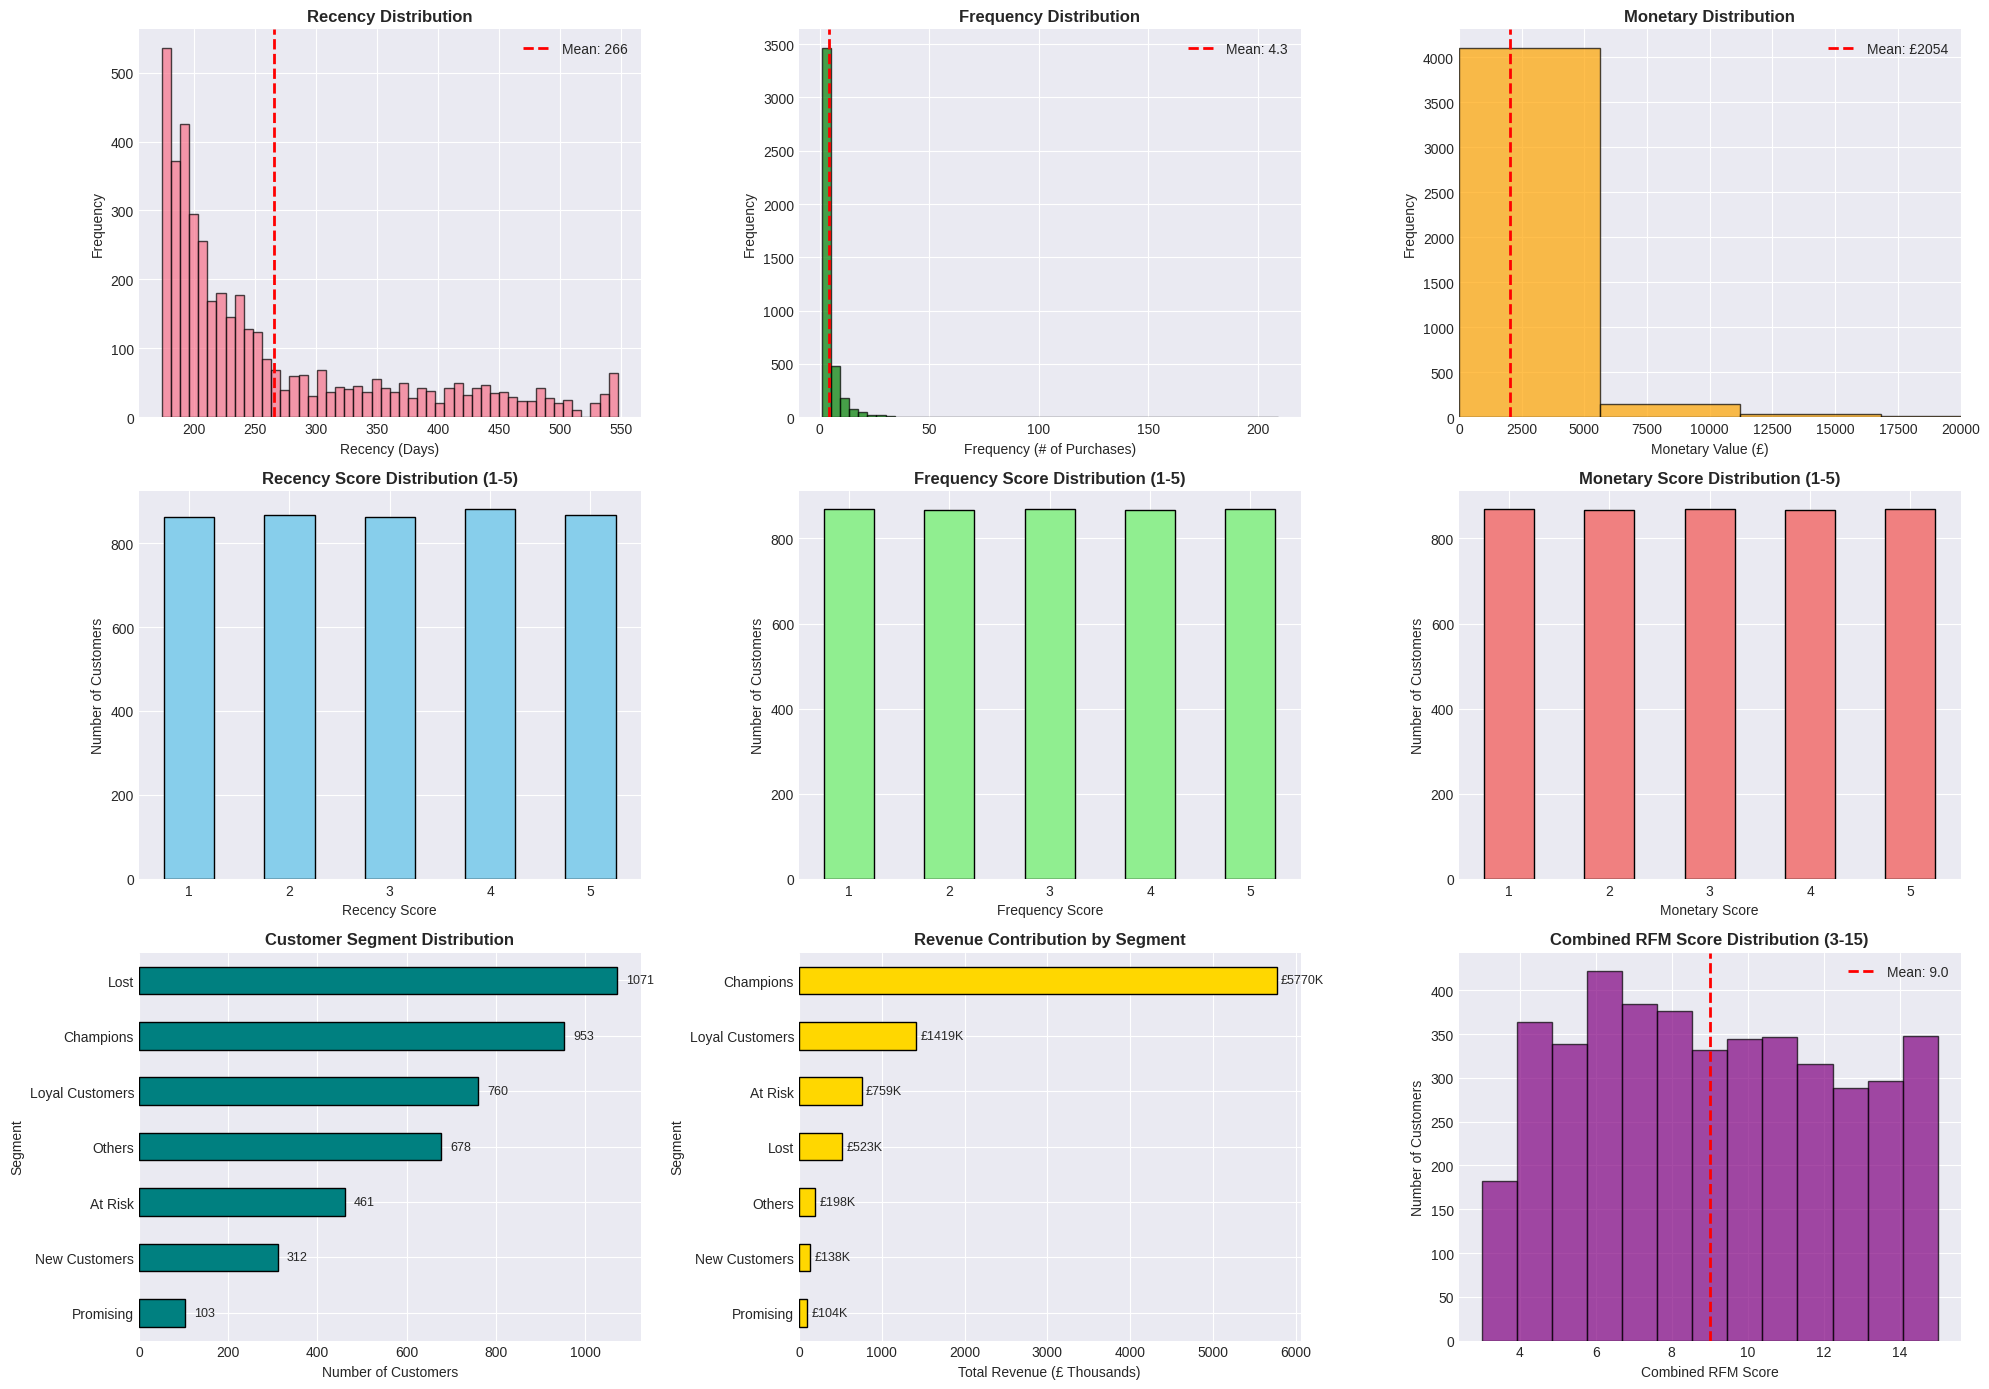


[4] Creating RFM scatter plot matrix...
✓ Saved: rfm_scatter_plots.png


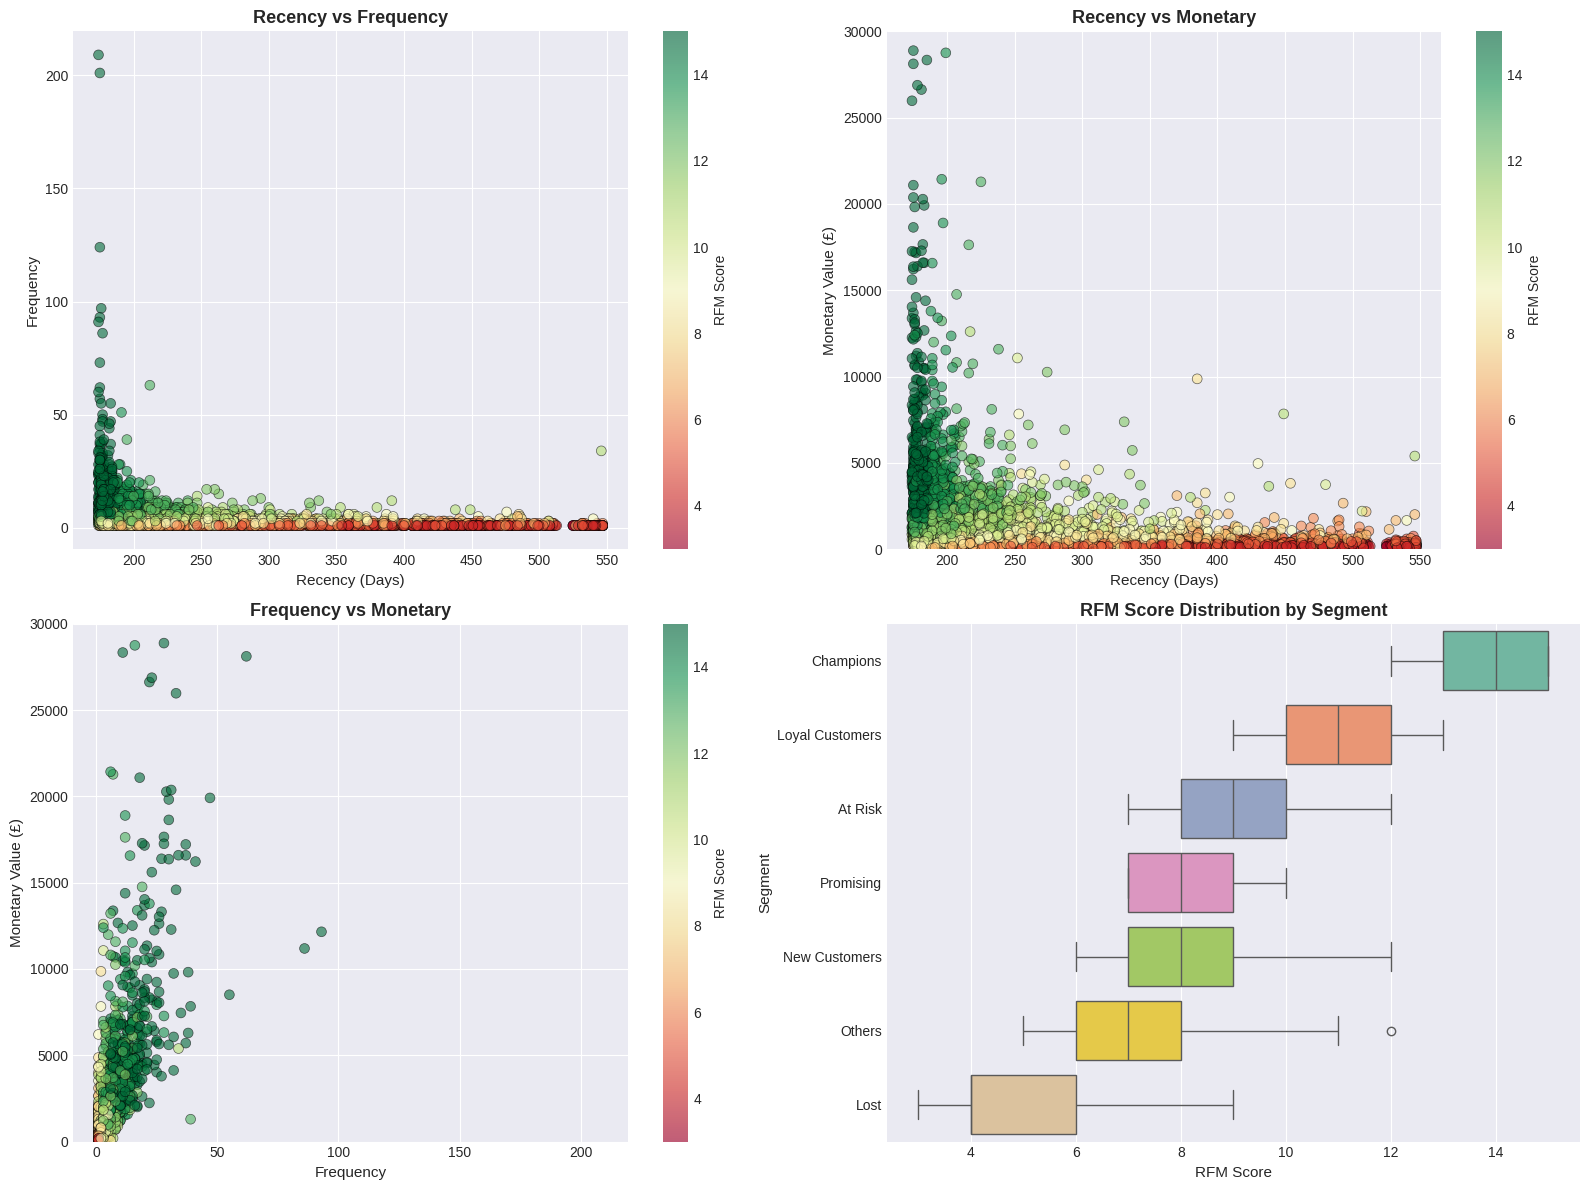


RFM Visualizations Complete!


In [ ]:
# ============================================================
# STEP 5: RFM VISUALIZATIONS
# ============================================================

print("="*80)
print("CREATING RFM VISUALIZATIONS")
print("="*80)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 14))

# ------------------------------------
# 1. RFM Score Distributions
# ------------------------------------
print("\n[1] Creating RFM score distribution plots...")

# Recency Distribution
ax1 = plt.subplot(3, 3, 1)
rfm['Recency'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Recency (Days)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Recency Distribution', fontsize=12, fontweight='bold')
plt.axvline(rfm['Recency'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rfm["Recency"].mean():.0f}')
plt.legend()

# Frequency Distribution
ax2 = plt.subplot(3, 3, 2)
rfm['Frequency'].hist(bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Frequency (# of Purchases)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency Distribution', fontsize=12, fontweight='bold')
plt.axvline(rfm['Frequency'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rfm["Frequency"].mean():.1f}')
plt.legend()

# Monetary Distribution (with log scale due to skewness)
ax3 = plt.subplot(3, 3, 3)
rfm['Monetary'].hist(bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Monetary Value (£)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Monetary Distribution', fontsize=12, fontweight='bold')
plt.axvline(rfm['Monetary'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: £{rfm["Monetary"].mean():.0f}')
plt.legend()
plt.xlim(0, 20000)  # Limit x-axis for better visibility

# ------------------------------------
# 2. RFM Score Distributions
# ------------------------------------
print("[2] Creating RFM score bar charts...")

# R Score Distribution
ax4 = plt.subplot(3, 3, 4)
r_counts = rfm['R_Score'].value_counts().sort_index()
r_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Recency Score', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.title('Recency Score Distribution (1-5)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

# F Score Distribution
ax5 = plt.subplot(3, 3, 5)
f_counts = rfm['F_Score'].value_counts().sort_index()
f_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Frequency Score', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.title('Frequency Score Distribution (1-5)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

# M Score Distribution
ax6 = plt.subplot(3, 3, 6)
m_counts = rfm['M_Score'].value_counts().sort_index()
m_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Monetary Score', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.title('Monetary Score Distribution (1-5)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

# ------------------------------------
# 3. Customer Segments
# ------------------------------------
print("[3] Creating customer segment visualizations...")

# Segment Distribution
ax7 = plt.subplot(3, 3, 7)
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)
segment_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Number of Customers', fontsize=10)
plt.ylabel('Segment', fontsize=10)
plt.title('Customer Segment Distribution', fontsize=12, fontweight='bold')
for i, v in enumerate(segment_counts):
    plt.text(v + 20, i, str(v), va='center', fontsize=9)

# Revenue by Segment
ax8 = plt.subplot(3, 3, 8)
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=True) / 1000
segment_revenue.plot(kind='barh', color='gold', edgecolor='black')
plt.xlabel('Total Revenue (£ Thousands)', fontsize=10)
plt.ylabel('Segment', fontsize=10)
plt.title('Revenue Contribution by Segment', fontsize=12, fontweight='bold')
for i, v in enumerate(segment_revenue):
    plt.text(v + 50, i, f'£{v:.0f}K', va='center', fontsize=9)

# Combined RFM Score Distribution
ax9 = plt.subplot(3, 3, 9)
rfm['RFM_Score'].hist(bins=13, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Combined RFM Score', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.title('Combined RFM Score Distribution (3-15)', fontsize=12, fontweight='bold')
plt.axvline(rfm['RFM_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rfm["RFM_Score"].mean():.1f}')
plt.legend()

plt.tight_layout()
plt.savefig('rfm_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
print("✓ Saved: rfm_analysis_comprehensive.png")
plt.show()

# ------------------------------------
# 4. RFM Scatter Plots
# ------------------------------------
print("\n[4] Creating RFM scatter plot matrix...")

fig2, axes = plt.subplots(2, 2, figsize=(16, 12))

# Recency vs Frequency
ax1 = axes[0, 0]
scatter1 = ax1.scatter(rfm['Recency'], rfm['Frequency'],
                       c=rfm['RFM_Score'], cmap='RdYlGn',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Recency (Days)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Recency vs Frequency', fontsize=13, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='RFM Score')

# Recency vs Monetary
ax2 = axes[0, 1]
scatter2 = ax2.scatter(rfm['Recency'], rfm['Monetary'],
                       c=rfm['RFM_Score'], cmap='RdYlGn',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Recency (Days)', fontsize=11)
ax2.set_ylabel('Monetary Value (£)', fontsize=11)
ax2.set_title('Recency vs Monetary', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 30000)
plt.colorbar(scatter2, ax=ax2, label='RFM Score')

# Frequency vs Monetary
ax3 = axes[1, 0]
scatter3 = ax3.scatter(rfm['Frequency'], rfm['Monetary'],
                       c=rfm['RFM_Score'], cmap='RdYlGn',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Frequency', fontsize=11)
ax3.set_ylabel('Monetary Value (£)', fontsize=11)
ax3.set_title('Frequency vs Monetary', fontsize=13, fontweight='bold')
ax3.set_ylim(0, 30000)
plt.colorbar(scatter3, ax=ax3, label='RFM Score')

# Segment by RFM Score (Box plot)
ax4 = axes[1, 1]
segment_order = rfm.groupby('Segment')['RFM_Score'].mean().sort_values(ascending=False).index
sns.boxplot(data=rfm, y='Segment', x='RFM_Score', order=segment_order,
            palette='Set2', ax=ax4)
ax4.set_xlabel('RFM Score', fontsize=11)
ax4.set_ylabel('Segment', fontsize=11)
ax4.set_title('RFM Score Distribution by Segment', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('rfm_scatter_plots.png', dpi=300, bbox_inches='tight')
print("✓ Saved: rfm_scatter_plots.png")
plt.show()

print("\n" + "="*60)
print("RFM Visualizations Complete!")
print("="*60)

In [ ]:
# ============================================================
# STEP 6: MERGE RFM WITH CUSTOMER DATA FOR CLUSTERING
# ============================================================

print("="*80)
print("PREPARING DATA FOR HIERARCHICAL CLUSTERING")
print("="*80)

# ------------------------------------
# MERGE DATASETS
# ------------------------------------
print("\n[1] Merging RFM results with customer demographic data...")

# Merge RFM with customer data
customer_rfm = customers_clean.merge(rfm, on='CustomerID', how='inner')

print(f"✓ Merged dataset shape: {customer_rfm.shape}")
print(f"  Customers with both RFM and demographic data: {len(customer_rfm):,}")

# Display first few rows
print("\nFirst 5 rows of merged dataset:")
print(customer_rfm.head())

# Check column names
print(f"\nAll columns in merged dataset:")
print(customer_rfm.columns.tolist())

# ------------------------------------
# CHECK FOR ADDITIONAL VARIABLES
# ------------------------------------
print("\n" + "="*60)
print("CHECKING FOR CLUSTERING VARIABLES")
print("="*60)

# The customer dataset should have synthetic variables like:
# Income, LoyaltyYears, SpendingScore, OnlinePurchases, StoreVisits
# Let's check what we have

print("\nAvailable columns:")
for i, col in enumerate(customer_rfm.columns, 1):
    print(f"{i}. {col}")

# Check data types
print("\nData types:")
print(customer_rfm.dtypes)

# ------------------------------------
# IDENTIFY VARIABLES FOR CLUSTERING
# ------------------------------------
print("\n" + "="*60)
print("VARIABLE SELECTION FOR CLUSTERING")
print("="*60)

# Based on the assignment, we need continuous variables
# Let's identify what we have
continuous_vars = customer_rfm.select_dtypes(include=[np.number]).columns.tolist()

print("\nContinuous variables available:")
for var in continuous_vars:
    print(f"  - {var}")

# Categorical variables
categorical_vars = customer_rfm.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical variables available:")
for var in categorical_vars:
    print(f"  - {var}")

# ------------------------------------
# SUMMARY STATISTICS
# ------------------------------------
print("\n" + "="*60)
print("SUMMARY STATISTICS OF CONTINUOUS VARIABLES")
print("="*60)

print(customer_rfm[continuous_vars].describe())

# Check for missing values
print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)

missing_check = customer_rfm.isnull().sum()
print(missing_check[missing_check > 0])
if missing_check.sum() == 0:
    print("✓ No missing values in merged dataset")

print("\n" + "="*60)
print("Data ready for clustering analysis!")
print("="*60)

PREPARING DATA FOR HIERARCHICAL CLUSTERING

[1] Merging RFM results with customer demographic data...
✓ Merged dataset shape: (4338, 16)
  Customers with both RFM and demographic data: 4,338

First 5 rows of merged dataset:
   CustomerID         Country PurchaseIntent Lifestyle AgeGroup Region  \
0     12346.0  United Kingdom           High  Suburban    36-50  South   
1     12347.0         Iceland            Low     Rural    18-25  South   
2     12348.0         Finland           High  Suburban    36-50   East   
3     12349.0           Italy           High     Urban    26-35   East   
4     12350.0          Norway            Low  Suburban    18-25   West   

  BusinessType  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0  Distributor      499          1  77183.60        1        1        5   
1       Online      176          7   4310.00        5        5        5   
2       Retail      249          4   1797.24        2        4        4   
3    Wholesale      192        

HIERARCHICAL CLUSTERING ANALYSIS

[1] Variable Selection and Justification
------------------------------------------------------------

Selected variables for clustering:
  1. Recency
  2. Frequency
  3. Monetary

Justification:
  • RFM metrics capture customer transaction behavior and value
  • Demographics provide context about customer characteristics
  • Engagement metrics reveal channel preferences and loyalty
  • All variables are continuous and relevant for segmentation

✓ Clustering dataset shape: (4338, 3)
  Number of customers: 4,338
  Number of features: 3

[2] Data Standardization
------------------------------------------------------------

Before standardization - descriptive statistics:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean    266.059474     4.272015    2054.266460
std     100.012264     7.697998    8989.230441
min     174.000000     1.000000       3.750000
25%     191.000000     1.000000     307.415000
50%   

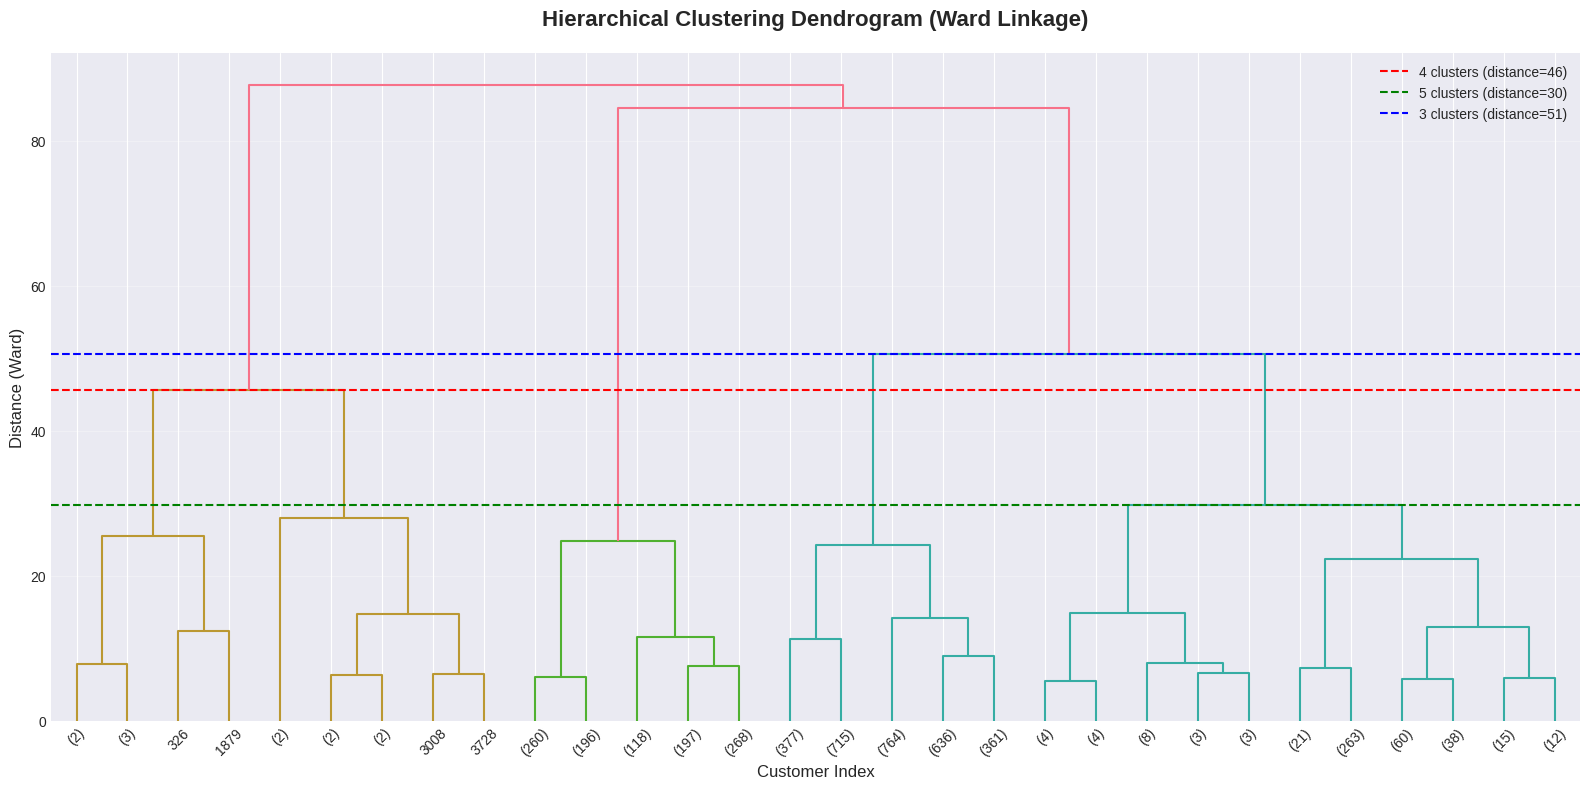

✓ Dendrogram created

[6] Cluster Selection Decision
------------------------------------------------------------

Testing different numbers of clusters...

3 clusters:
  Cluster 1: 15 customers (0.3%)
  Cluster 2: 1,039 customers (24.0%)
  Cluster 3: 3,284 customers (75.7%)

4 clusters:
  Cluster 1: 15 customers (0.3%)
  Cluster 2: 1,039 customers (24.0%)
  Cluster 3: 2,853 customers (65.8%)
  Cluster 4: 431 customers (9.9%)

5 clusters:
  Cluster 1: 7 customers (0.2%)
  Cluster 2: 8 customers (0.2%)
  Cluster 3: 1,039 customers (24.0%)
  Cluster 4: 2,853 customers (65.8%)
  Cluster 5: 431 customers (9.9%)

✓ Selected number of clusters: 4

Rationale:
  • 4 clusters provide meaningful segmentation
  • Large jump in distance after this merge (visible in dendrogram)
  • Cluster sizes are reasonably balanced
  • Sufficient granularity for targeted marketing strategies

[7] Assigning Cluster Labels
------------------------------------------------------------
✓ Clusters assigned to 4,338 c

In [ ]:
# ============================================================
# STEP 7: HIERARCHICAL CLUSTERING ANALYSIS
# ============================================================

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("HIERARCHICAL CLUSTERING ANALYSIS")
print("="*80)

# ------------------------------------
# VARIABLE SELECTION FOR CLUSTERING
# ------------------------------------
print("\n[1] Variable Selection and Justification")
print("-" * 60)

# Select variables for clustering based on business relevance
# We want to segment customers based on:
# 1. Behavioral metrics (RFM)
# 2. Demographics (Age, Income if available)
# 3. Engagement metrics (LoyaltyYears, OnlinePurchases, StoreVisits, SpendingScore)

# Define clustering variables
clustering_vars = []

# Add RFM metrics
if 'Recency' in customer_rfm.columns:
    clustering_vars.append('Recency')
if 'Frequency' in customer_rfm.columns:
    clustering_vars.append('Frequency')
if 'Monetary' in customer_rfm.columns:
    clustering_vars.append('Monetary')

# Add demographic variables
if 'Age' in customer_rfm.columns:
    clustering_vars.append('Age')
if 'Income' in customer_rfm.columns:
    clustering_vars.append('Income')

# Add behavioral/engagement variables
if 'LoyaltyYears' in customer_rfm.columns:
    clustering_vars.append('LoyaltyYears')
if 'SpendingScore' in customer_rfm.columns:
    clustering_vars.append('SpendingScore')
if 'OnlinePurchases' in customer_rfm.columns:
    clustering_vars.append('OnlinePurchases')
if 'StoreVisits' in customer_rfm.columns:
    clustering_vars.append('StoreVisits')

print("\nSelected variables for clustering:")
for i, var in enumerate(clustering_vars, 1):
    print(f"  {i}. {var}")

print("\nJustification:")
print("  • RFM metrics capture customer transaction behavior and value")
print("  • Demographics provide context about customer characteristics")
print("  • Engagement metrics reveal channel preferences and loyalty")
print("  • All variables are continuous and relevant for segmentation")

# Create clustering dataset
cluster_data = customer_rfm[clustering_vars].copy()

print(f"\n✓ Clustering dataset shape: {cluster_data.shape}")
print(f"  Number of customers: {len(cluster_data):,}")
print(f"  Number of features: {len(clustering_vars)}")

# ------------------------------------
# DATA STANDARDIZATION
# ------------------------------------
print("\n[2] Data Standardization")
print("-" * 60)

print("\nBefore standardization - descriptive statistics:")
print(cluster_data.describe())

# Standardize using StandardScaler (Z-score normalization)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Convert back to DataFrame for easier handling
cluster_data_scaled_df = pd.DataFrame(
    cluster_data_scaled,
    columns=clustering_vars,
    index=cluster_data.index
)

print("\nAfter standardization - descriptive statistics:")
print(cluster_data_scaled_df.describe())

print("\nScaling Method Justification:")
print("  • StandardScaler (Z-score normalization) used")
print("  • Transforms variables to mean=0, std=1")
print("  • Prevents variables with larger scales from dominating distance calculations")
print("  • Essential for hierarchical clustering using Euclidean distance")
print("  • Appropriate when variables are on different scales (e.g., dollars vs. counts)")

# ------------------------------------
# HIERARCHICAL CLUSTERING
# ------------------------------------
print("\n[3] Performing Hierarchical Clustering")
print("-" * 60)

print("\nClustering specifications:")
print("  • Linkage method: Ward's")
print("  • Distance metric: Euclidean")

print("\nWard's Linkage Justification:")
print("  • Minimizes within-cluster variance")
print("  • Tends to create compact, spherical clusters")
print("  • Works well with Euclidean distance")
print("  • Suitable for customer segmentation where we want distinct groups")
print("  • Generally produces balanced cluster sizes")

# Perform hierarchical clustering
print("\nComputing linkage matrix...")
linkage_matrix = linkage(cluster_data_scaled, method='ward', metric='euclidean')

print("✓ Linkage computation complete")
print(f"  Linkage matrix shape: {linkage_matrix.shape}")

# ------------------------------------
# DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ------------------------------------
print("\n[4] Determining Optimal Number of Clusters")
print("-" * 60)

# Examine agglomeration coefficients (distances at each merge)
last_merges = linkage_matrix[-10:, 2]

print("\nLast 10 merges (agglomeration distances):")
for i, dist in enumerate(reversed(last_merges), 1):
    print(f"  Merge {i}: {dist:.2f}")

# Calculate percentage change between merges
print("\nPercentage change between consecutive merges:")
for i in range(len(last_merges)-1, 0, -1):
    pct_change = ((last_merges[i] - last_merges[i-1]) / last_merges[i-1]) * 100
    num_clusters = len(last_merges) - i + 1
    print(f"  {num_clusters} → {num_clusters-1} clusters: {pct_change:.1f}% increase in distance")

# ------------------------------------
# CREATE DENDROGRAM
# ------------------------------------
print("\n[5] Creating Dendrogram")
print("-" * 60)

plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Index', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only last p merged clusters
    p=30,  # Show last 30 merges
    leaf_font_size=10,
    show_leaf_counts=True
)

plt.axhline(y=linkage_matrix[-4, 2], color='r', linestyle='--',
            label=f'4 clusters (distance={linkage_matrix[-4, 2]:.0f})')
plt.axhline(y=linkage_matrix[-5, 2], color='g', linestyle='--',
            label=f'5 clusters (distance={linkage_matrix[-5, 2]:.0f})')
plt.axhline(y=linkage_matrix[-3, 2], color='b', linestyle='--',
            label=f'3 clusters (distance={linkage_matrix[-3, 2]:.0f})')

plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Dendrogram created")

# ------------------------------------
# SELECT NUMBER OF CLUSTERS
# ------------------------------------
print("\n[6] Cluster Selection Decision")
print("-" * 60)

# Based on dendrogram, let's test 3, 4, and 5 clusters
n_clusters_options = [3, 4, 5]

print("\nTesting different numbers of clusters...")
for n in n_clusters_options:
    clusters = fcluster(linkage_matrix, n, criterion='maxclust')
    cluster_counts = pd.Series(clusters).value_counts().sort_index()
    print(f"\n{n} clusters:")
    for cluster_id, count in cluster_counts.items():
        pct = (count / len(clusters)) * 100
        print(f"  Cluster {cluster_id}: {count:,} customers ({pct:.1f}%)")

# Select optimal number (let's go with 4 for good balance)
optimal_clusters = 4
print(f"\n✓ Selected number of clusters: {optimal_clusters}")
print("\nRationale:")
print(f"  • {optimal_clusters} clusters provide meaningful segmentation")
print("  • Large jump in distance after this merge (visible in dendrogram)")
print("  • Cluster sizes are reasonably balanced")
print("  • Sufficient granularity for targeted marketing strategies")

# ------------------------------------
# ASSIGN CLUSTER LABELS
# ------------------------------------
print("\n[7] Assigning Cluster Labels")
print("-" * 60)

# Assign clusters
customer_rfm['Cluster'] = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

print(f"✓ Clusters assigned to {len(customer_rfm):,} customers")

# Cluster distribution
cluster_dist = customer_rfm['Cluster'].value_counts().sort_index()
print("\nCluster distribution:")
for cluster_id, count in cluster_dist.items():
    pct = (count / len(customer_rfm)) * 100
    print(f"  Cluster {cluster_id}: {count:,} customers ({pct:.1f}%)")

print("\n" + "="*60)
print("Hierarchical clustering complete!")
print("="*60)

CLUSTER PROFILING AND ANALYSIS

[1] Cluster Profiles - RFM Metrics
------------------------------------------------------------

RFM Profile by Cluster:
            Recency                              Frequency                    \
               mean median        std  min  max       mean median        std   
Cluster                                                                        
1        180.000000  175.0  10.843036  174  212  83.466667   73.0  58.637953   
2        424.279115  419.0  65.127273  321  547   1.564004    1.0   1.161975   
3        220.310550  210.0  37.372883  174  337   3.100245    3.0   2.051522   
4        190.473318  182.0  31.925547  174  546  15.800464   13.0   8.702959   

                       Monetary                                               
        min  max           mean    median           std       min        max  
Cluster                                                                       
1         2  209  111916.309333  91062.38  84286.

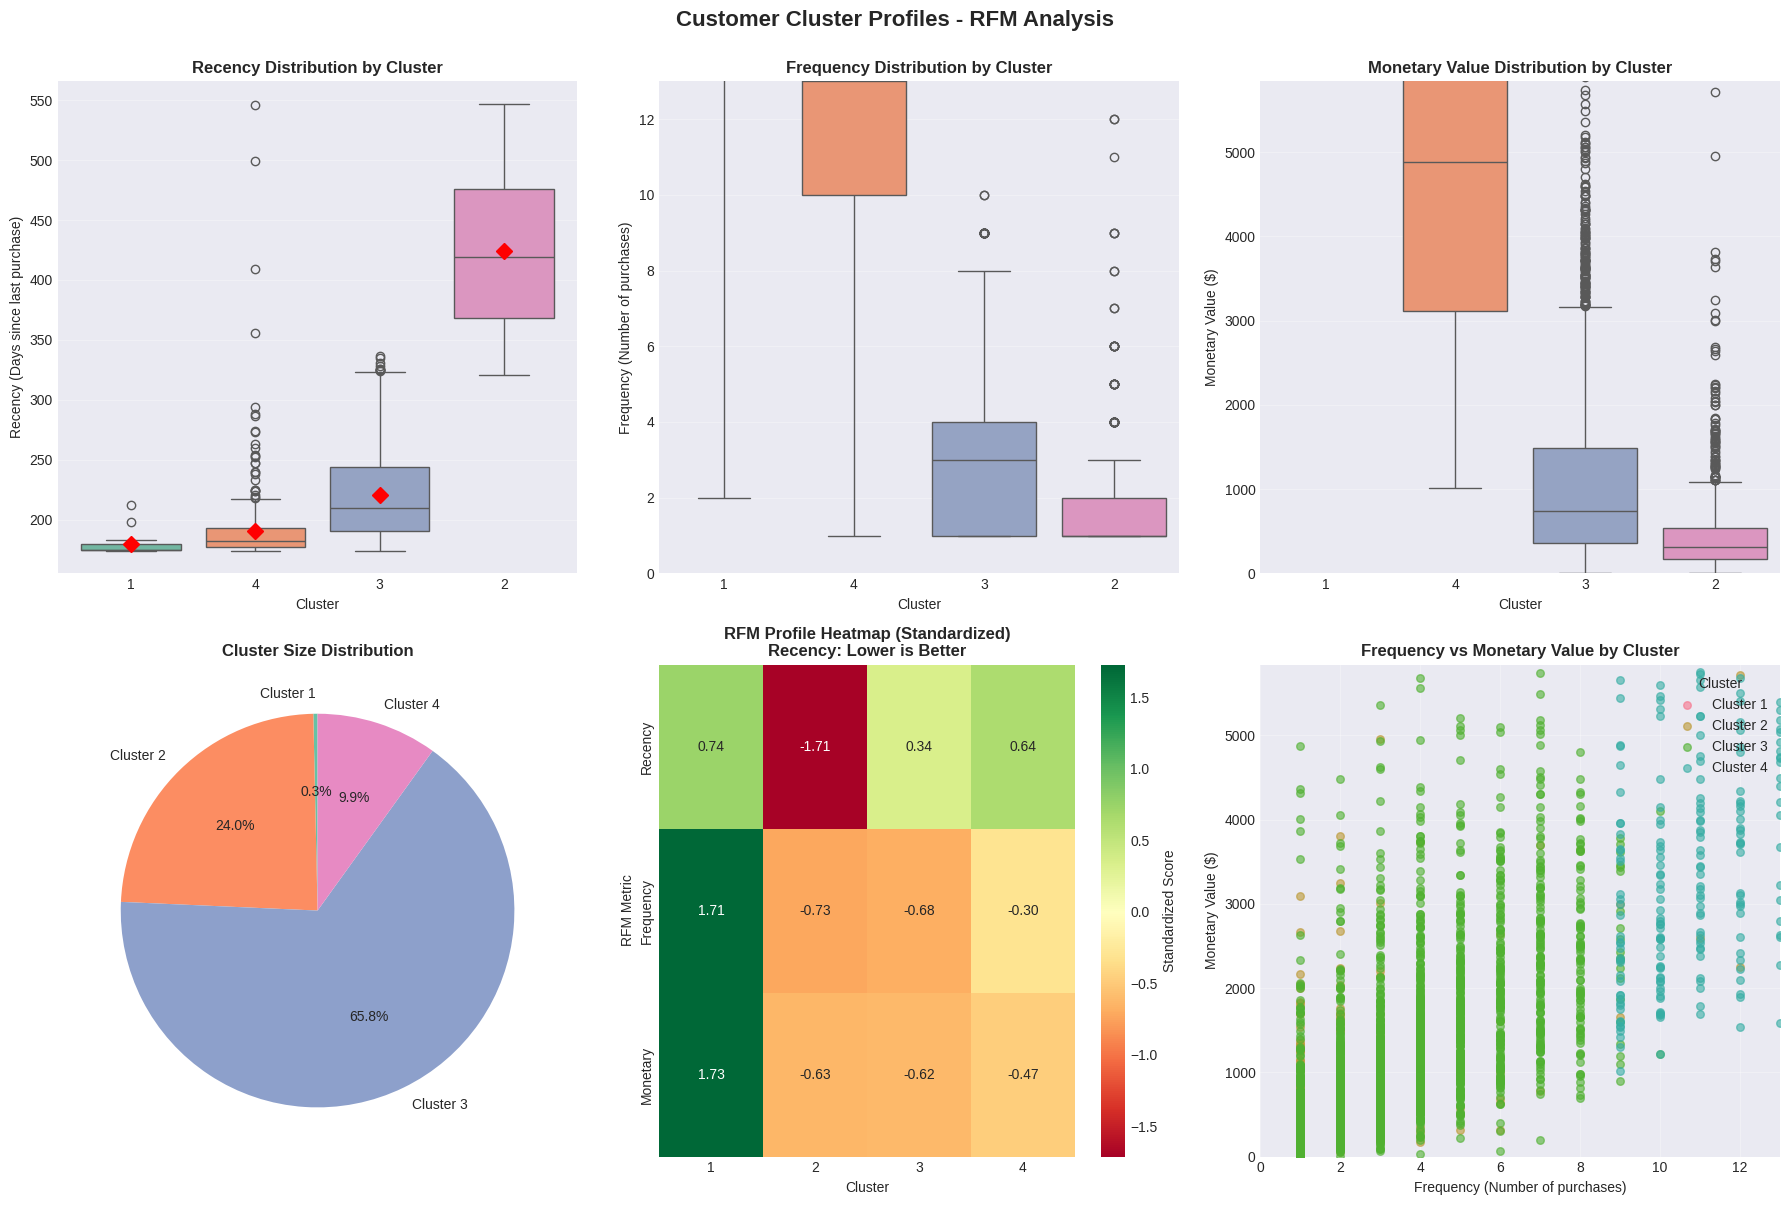

✓ Cluster profile visualizations created

[6] Cluster Characterization & Business Interpretation
------------------------------------------------------------

CLUSTER 1 - 15 customers (0.3%)

RFM Characteristics:
  • Average Recency: 180 days
  • Average Frequency: 83.5 purchases
  • Average Monetary: $111,916.31

Comparison to Overall Average:
  • Recency: -32.3%
  • Frequency: +1853.8%
  • Monetary: +5348.0%
  • Average RFM Score: 14.7 / 15

CLUSTER 2 - 1039 customers (24.0%)

RFM Characteristics:
  • Average Recency: 424 days
  • Average Frequency: 1.6 purchases
  • Average Monetary: $482.53

Comparison to Overall Average:
  • Recency: +59.5%
  • Frequency: -63.4%
  • Monetary: -76.5%
  • Average RFM Score: 5.2 / 15

CLUSTER 3 - 2853 customers (65.8%)

RFM Characteristics:
  • Average Recency: 220 days
  • Average Frequency: 3.1 purchases
  • Average Monetary: $1,127.59

Comparison to Overall Average:
  • Recency: -17.2%
  • Frequency: -27.4%
  • Monetary: -45.1%
  • Average RFM Sco

In [ ]:
# ============================================================
# STEP 8: CLUSTER PROFILING AND ANALYSIS
# ============================================================

print("="*80)
print("CLUSTER PROFILING AND ANALYSIS")
print("="*80)

# ------------------------------------
# CLUSTER PROFILES - RFM METRICS
# ------------------------------------
print("\n[1] Cluster Profiles - RFM Metrics")
print("-" * 60)

# Calculate mean values for each cluster
rfm_profile = customer_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].agg([
    'mean', 'median', 'std', 'min', 'max'
])

print("\nRFM Profile by Cluster:")
print(rfm_profile)

# Simplified summary
rfm_summary = customer_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nSimplified RFM Means by Cluster:")
print(rfm_summary.round(2))

# ------------------------------------
# CLUSTER PROFILES - RFM SCORES
# ------------------------------------
print("\n[2] Cluster Profiles - RFM Scores")
print("-" * 60)

# If RFM scores exist
if 'R_Score' in customer_rfm.columns:
    score_profile = customer_rfm.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].mean()
    print("\nAverage RFM Scores by Cluster:")
    print(score_profile.round(2))

# ------------------------------------
# CLUSTER PROFILES - DEMOGRAPHICS
# ------------------------------------
print("\n[3] Cluster Profiles - Demographics & Behavior")
print("-" * 60)

# Check which demographic/behavioral variables are available
demo_vars = []
for var in ['Age', 'Income', 'LoyaltyYears', 'SpendingScore', 'OnlinePurchases', 'StoreVisits']:
    if var in customer_rfm.columns:
        demo_vars.append(var)

if demo_vars:
    demo_profile = customer_rfm.groupby('Cluster')[demo_vars].mean()
    print("\nDemographic/Behavioral Profile by Cluster:")
    print(demo_profile.round(2))
else:
    print("\n⚠ No additional demographic variables available in this dataset")
    print("  Clustering is based solely on RFM metrics")

# ------------------------------------
# CLUSTER PROFILES - COUNTRY DISTRIBUTION
# ------------------------------------
print("\n[4] Cluster Profiles - Geographic Distribution")
print("-" * 60)

if 'Country' in customer_rfm.columns:
    print("\nTop 5 countries by cluster:")
    for cluster in sorted(customer_rfm['Cluster'].unique()):
        print(f"\n  Cluster {cluster}:")
        top_countries = customer_rfm[customer_rfm['Cluster'] == cluster]['Country'].value_counts().head(5)
        for country, count in top_countries.items():
            pct = (count / len(customer_rfm[customer_rfm['Cluster'] == cluster])) * 100
            print(f"    {country}: {count} customers ({pct:.1f}%)")

# ------------------------------------
# VISUALIZE CLUSTER PROFILES
# ------------------------------------
print("\n[5] Creating Cluster Profile Visualizations")
print("-" * 60)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Cluster Profiles - RFM Analysis', fontsize=16, fontweight='bold', y=1.00)

# 1. Recency by Cluster
ax1 = axes[0, 0]
cluster_order = rfm_summary.sort_values('Recency').index
sns.boxplot(data=customer_rfm, x='Cluster', y='Recency', order=cluster_order,
            palette='Set2', ax=ax1)
ax1.set_title('Recency Distribution by Cluster', fontweight='bold')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Recency (Days since last purchase)')
ax1.grid(axis='y', alpha=0.3)

# Add mean markers
for i, cluster in enumerate(cluster_order):
    mean_val = rfm_summary.loc[cluster, 'Recency']
    ax1.plot(i, mean_val, marker='D', color='red', markersize=8, zorder=5)

# 2. Frequency by Cluster
ax2 = axes[0, 1]
cluster_order_freq = rfm_summary.sort_values('Frequency', ascending=False).index
sns.boxplot(data=customer_rfm, x='Cluster', y='Frequency', order=cluster_order_freq,
            palette='Set2', ax=ax2)
ax2.set_title('Frequency Distribution by Cluster', fontweight='bold')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Frequency (Number of purchases)')
ax2.set_ylim(0, customer_rfm['Frequency'].quantile(0.95))  # Limit to 95th percentile for better view
ax2.grid(axis='y', alpha=0.3)

# 3. Monetary by Cluster
ax3 = axes[0, 2]
cluster_order_mon = rfm_summary.sort_values('Monetary', ascending=False).index
sns.boxplot(data=customer_rfm, x='Cluster', y='Monetary', order=cluster_order_mon,
            palette='Set2', ax=ax3)
ax3.set_title('Monetary Value Distribution by Cluster', fontweight='bold')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Monetary Value ($)')
ax3.set_ylim(0, customer_rfm['Monetary'].quantile(0.95))  # Limit to 95th percentile
ax3.grid(axis='y', alpha=0.3)

# 4. Cluster Size Distribution
ax4 = axes[1, 0]
cluster_sizes = customer_rfm['Cluster'].value_counts().sort_index()
colors_pie = sns.color_palette('Set2', len(cluster_sizes))
ax4.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax4.set_title('Cluster Size Distribution', fontweight='bold')

# 5. Average RFM by Cluster (Heatmap)
ax5 = axes[1, 1]
# Normalize RFM for better visualization
rfm_normalized = customer_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
# Invert Recency (lower is better)
rfm_normalized['Recency'] = -rfm_normalized['Recency']
# Standardize
from sklearn.preprocessing import StandardScaler
scaler_viz = StandardScaler()
rfm_normalized_scaled = pd.DataFrame(
    scaler_viz.fit_transform(rfm_normalized),
    columns=rfm_normalized.columns,
    index=rfm_normalized.index
)

sns.heatmap(rfm_normalized_scaled.T, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, ax=ax5, cbar_kws={'label': 'Standardized Score'})
ax5.set_title('RFM Profile Heatmap (Standardized)\nRecency: Lower is Better', fontweight='bold')
ax5.set_xlabel('Cluster')
ax5.set_ylabel('RFM Metric')

# 6. Scatter plot: Frequency vs Monetary colored by Cluster
ax6 = axes[1, 2]
for cluster in sorted(customer_rfm['Cluster'].unique()):
    cluster_data = customer_rfm[customer_rfm['Cluster'] == cluster]
    ax6.scatter(cluster_data['Frequency'], cluster_data['Monetary'],
                label=f'Cluster {cluster}', alpha=0.6, s=30)
ax6.set_title('Frequency vs Monetary Value by Cluster', fontweight='bold')
ax6.set_xlabel('Frequency (Number of purchases)')
ax6.set_ylabel('Monetary Value ($)')
ax6.set_xlim(0, customer_rfm['Frequency'].quantile(0.95))
ax6.set_ylim(0, customer_rfm['Monetary'].quantile(0.95))
ax6.legend(title='Cluster', loc='upper right')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Cluster profile visualizations created")

# ------------------------------------
# CLUSTER CHARACTERIZATION
# ------------------------------------
print("\n[6] Cluster Characterization & Business Interpretation")
print("-" * 60)

# Analyze each cluster
for cluster in sorted(customer_rfm['Cluster'].unique()):
    cluster_data = customer_rfm[customer_rfm['Cluster'] == cluster]

    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(customer_rfm)*100:.1f}%)")
    print(f"{'='*60}")

    # RFM characteristics
    avg_recency = cluster_data['Recency'].mean()
    avg_frequency = cluster_data['Frequency'].mean()
    avg_monetary = cluster_data['Monetary'].mean()

    print(f"\nRFM Characteristics:")
    print(f"  • Average Recency: {avg_recency:.0f} days")
    print(f"  • Average Frequency: {avg_frequency:.1f} purchases")
    print(f"  • Average Monetary: ${avg_monetary:,.2f}")

    # Compare to overall average
    print(f"\nComparison to Overall Average:")
    print(f"  • Recency: {((avg_recency / customer_rfm['Recency'].mean() - 1) * 100):+.1f}%")
    print(f"  • Frequency: {((avg_frequency / customer_rfm['Frequency'].mean() - 1) * 100):+.1f}%")
    print(f"  • Monetary: {((avg_monetary / customer_rfm['Monetary'].mean() - 1) * 100):+.1f}%")

    # RFM Score if available
    if 'RFM_Score' in customer_rfm.columns:
        avg_rfm_score = cluster_data['RFM_Score'].mean()
        print(f"  • Average RFM Score: {avg_rfm_score:.1f} / 15")

    # Customer segments within cluster
    if 'Customer_Segment' in customer_rfm.columns:
        print(f"\nCustomer Segments in this cluster:")
        segment_dist = cluster_data['Customer_Segment'].value_counts()
        for segment, count in segment_dist.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  • {segment}: {count} ({pct:.1f}%)")

# ------------------------------------
# CLUSTER NAMING AND STRATEGY
# ------------------------------------
print("\n" + "="*80)
print("CLUSTER NAMING & STRATEGIC RECOMMENDATIONS")
print("="*80)

# Analyze cluster profiles to assign names
cluster_names = {}
cluster_strategies = {}

for cluster in sorted(customer_rfm['Cluster'].unique()):
    cluster_data = customer_rfm[customer_rfm['Cluster'] == cluster]
    avg_recency = cluster_data['Recency'].mean()
    avg_frequency = cluster_data['Frequency'].mean()
    avg_monetary = cluster_data['Monetary'].mean()

    # Determine cluster name based on RFM profile
    if avg_frequency > customer_rfm['Frequency'].quantile(0.75) and \
       avg_monetary > customer_rfm['Monetary'].quantile(0.75):
        name = "Champions / VIP Customers"
        strategy = "Reward loyalty, ask for reviews, offer exclusive products"

    elif avg_frequency > customer_rfm['Frequency'].mean() and \
         avg_monetary > customer_rfm['Monetary'].mean() and \
         avg_recency < customer_rfm['Recency'].median():
        name = "Loyal Customers"
        strategy = "Upsell higher value products, solicit feedback"

    elif avg_recency < customer_rfm['Recency'].median() and \
         avg_frequency < customer_rfm['Frequency'].mean():
        name = "Promising / New Customers"
        strategy = "Onboarding programs, build relationships, frequency promotions"

    elif avg_recency > customer_rfm['Recency'].quantile(0.75):
        name = "At Risk / Churning"
        strategy = "Re-engagement campaigns, win-back offers, surveys"

    elif avg_monetary < customer_rfm['Monetary'].quantile(0.25):
        name = "Low Value / Dormant"
        strategy = "Cost-effective retention, evaluate profitability"

    else:
        name = "Need Attention / Potential Loyalists"
        strategy = "Engagement campaigns, limited-time offers, personalized communication"

    cluster_names[cluster] = name
    cluster_strategies[cluster] = strategy

# Display cluster names and strategies
print("\n")
for cluster in sorted(customer_rfm['Cluster'].unique()):
    cluster_data = customer_rfm[customer_rfm['Cluster'] == cluster]
    print(f"CLUSTER {cluster}: {cluster_names[cluster]}")
    print(f"  Size: {len(cluster_data):,} customers ({len(cluster_data)/len(customer_rfm)*100:.1f}%)")
    print(f"  Strategy: {cluster_strategies[cluster]}")
    print()

# Add cluster names to dataframe
customer_rfm['Cluster_Name'] = customer_rfm['Cluster'].map(cluster_names)

print("="*80)
print("Cluster profiling complete!")
print("="*80)

COUNTRY-LEVEL GEOGRAPHIC ANALYSIS

[1] Computing Country-Level Aggregates
------------------------------------------------------------
✓ Country-level aggregates computed for 37 countries

Country aggregates shape: (37, 12)

Country-Level Summary Statistics:
           Country  Customer_Count  Monetary_sum  Monetary_mean  \
0        Australia               9     139911.45       15545.72   
1          Austria              11      16779.59        1525.42   
2          Bahrain               2        548.40         274.20   
3          Belgium              24      41551.26        1731.30   
4           Brazil               1       1143.60        1143.60   
5           Canada               4       3666.38         916.59   
6  Channel Islands               9      20450.44        2272.27   
7           Cyprus               7      13060.38        1865.77   
8   Czech Republic               1        826.74         826.74   
9          Denmark               7      14751.52        2107.36   

   

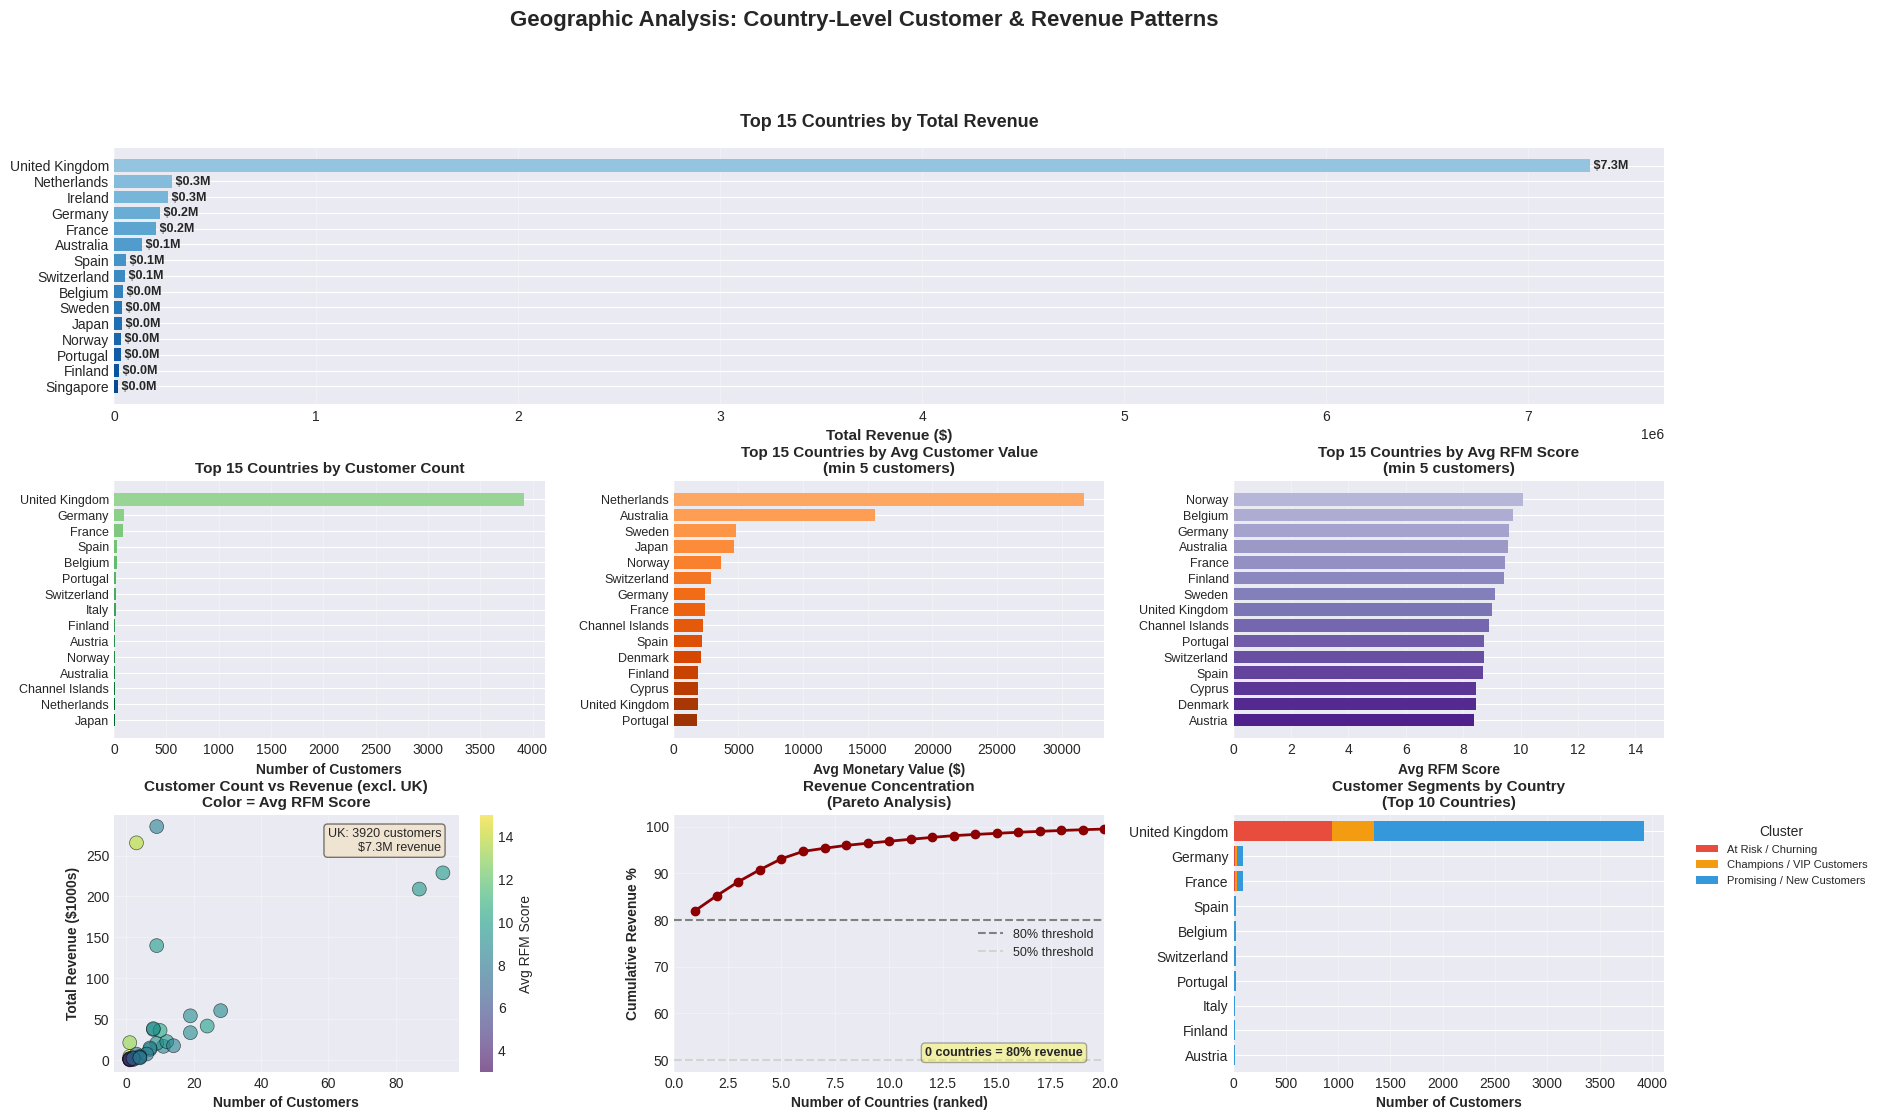

✓ Geographic visualizations created

[7] Geographic Insights Summary
------------------------------------------------------------

1. MARKET CONCENTRATION:
   • United Kingdom dominates with 90.4% of customers
   • UK accounts for 82.0% of total revenue
   • 37 countries total in dataset

2. TOP REVENUE MARKETS:
   • United Kingdom      : $  7.31M ( 82.0% of total)
   • Netherlands         : $  0.29M (  3.2% of total)
   • Ireland             : $  0.27M (  3.0% of total)
   • Germany             : $  0.23M (  2.6% of total)
   • France              : $  0.21M (  2.3% of total)

3. HIGHEST VALUE CUSTOMERS (by avg monetary):
   • Netherlands         : $31,716.26 avg per customer
   • Australia           : $15,545.72 avg per customer
   • Sweden              : $4,797.29 avg per customer
   • Japan               : $4,677.05 avg per customer
   • Norway              : $3,616.54 avg per customer

4. BEST RFM SCORES:
   • Norway              : RFM Score = 10.10
   • Belgium             : RFM 

In [ ]:
# ============================================================
# STEP 9: COUNTRY-LEVEL GEOGRAPHIC ANALYSIS
# ============================================================

print("="*80)
print("COUNTRY-LEVEL GEOGRAPHIC ANALYSIS")
print("="*80)

# ------------------------------------
# COUNTRY-LEVEL AGGREGATIONS
# ------------------------------------
print("\n[1] Computing Country-Level Aggregates")
print("-" * 60)

# Aggregate metrics by country
country_aggregates = customer_rfm.groupby('Country').agg({
    'CustomerID': 'count',  # Number of customers
    'Monetary': ['sum', 'mean', 'median'],  # Revenue metrics
    'Frequency': ['sum', 'mean', 'median'],  # Purchase frequency
    'Recency': ['mean', 'median'],  # Recency metrics
    'RFM_Score': ['mean', 'median']  # Overall RFM score
}).round(2)

# Flatten column names
country_aggregates.columns = ['_'.join(col).strip() for col in country_aggregates.columns.values]
country_aggregates = country_aggregates.rename(columns={'CustomerID_count': 'Customer_Count'})

# Reset index to make Country a column
country_aggregates = country_aggregates.reset_index()

print(f"✓ Country-level aggregates computed for {len(country_aggregates)} countries")
print(f"\nCountry aggregates shape: {country_aggregates.shape}")

# Display summary
print("\nCountry-Level Summary Statistics:")
print(country_aggregates.head(10))

# ------------------------------------
# TOP COUNTRIES BY REVENUE
# ------------------------------------
print("\n[2] Top Countries by Total Revenue")
print("-" * 60)

top_countries_revenue = country_aggregates.nlargest(10, 'Monetary_sum')
print("\nTop 10 Countries by Total Revenue:")
for idx, row in top_countries_revenue.iterrows():
    print(f"  {row['Country']:20s}: ${row['Monetary_sum']:>12,.2f} ({row['Customer_Count']:>4.0f} customers)")

# ------------------------------------
# TOP COUNTRIES BY AVERAGE RFM SCORE
# ------------------------------------
print("\n[3] Top Countries by Average RFM Score")
print("-" * 60)

# Filter countries with at least 5 customers for meaningful averages
country_rfm = country_aggregates[country_aggregates['Customer_Count'] >= 5].copy()
top_countries_rfm = country_rfm.nlargest(10, 'RFM_Score_mean')

print("\nTop 10 Countries by Average RFM Score (min 5 customers):")
for idx, row in top_countries_rfm.iterrows():
    print(f"  {row['Country']:20s}: RFM Score = {row['RFM_Score_mean']:.2f} ({row['Customer_Count']:.0f} customers)")

# ------------------------------------
# TOP COUNTRIES BY AVERAGE MONETARY VALUE
# ------------------------------------
print("\n[4] Top Countries by Average Customer Value")
print("-" * 60)

top_countries_avg_value = country_rfm.nlargest(10, 'Monetary_mean')
print("\nTop 10 Countries by Average Monetary Value per Customer (min 5 customers):")
for idx, row in top_countries_avg_value.iterrows():
    print(f"  {row['Country']:20s}: ${row['Monetary_mean']:>10,.2f} avg ({row['Customer_Count']:.0f} customers)")

# ------------------------------------
# CLUSTER DISTRIBUTION BY COUNTRY
# ------------------------------------
print("\n[5] High-Value Customer Distribution by Country")
print("-" * 60)

# Analyze cluster distribution by country
cluster_by_country = customer_rfm.groupby(['Country', 'Cluster_Name']).size().unstack(fill_value=0)

# Focus on top 10 countries by customer count
top_10_countries = country_aggregates.nlargest(10, 'Customer_Count')['Country'].tolist()

print("\nCluster distribution in top 10 countries:")
for country in top_10_countries:
    if country in cluster_by_country.index:
        total = cluster_by_country.loc[country].sum()
        print(f"\n  {country} ({total} customers):")
        for cluster_name in cluster_by_country.columns:
            count = cluster_by_country.loc[country, cluster_name]
            pct = (count / total * 100) if total > 0 else 0
            print(f"    {cluster_name:30s}: {count:4.0f} ({pct:5.1f}%)")

# ------------------------------------
# VISUALIZATIONS
# ------------------------------------
print("\n[6] Creating Geographic Visualizations")
print("-" * 60)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Top 15 Countries by Total Revenue (Bar Chart)
ax1 = fig.add_subplot(gs[0, :])
top_15_revenue = country_aggregates.nlargest(15, 'Monetary_sum')
colors_revenue = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_15_revenue)))
bars1 = ax1.barh(range(len(top_15_revenue)), top_15_revenue['Monetary_sum'], color=colors_revenue)
ax1.set_yticks(range(len(top_15_revenue)))
ax1.set_yticklabels(top_15_revenue['Country'])
ax1.set_xlabel('Total Revenue ($)', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Countries by Total Revenue', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_15_revenue.iterrows()):
    ax1.text(row['Monetary_sum'], i, f" ${row['Monetary_sum']/1e6:.1f}M",
             va='center', fontsize=9, fontweight='bold')

# Invert y-axis so highest is on top
ax1.invert_yaxis()

# 2. Top 15 Countries by Customer Count
ax2 = fig.add_subplot(gs[1, 0])
top_15_customers = country_aggregates.nlargest(15, 'Customer_Count')
colors_customers = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_15_customers)))
bars2 = ax2.barh(range(len(top_15_customers)), top_15_customers['Customer_Count'], color=colors_customers)
ax2.set_yticks(range(len(top_15_customers)))
ax2.set_yticklabels(top_15_customers['Country'], fontsize=9)
ax2.set_xlabel('Number of Customers', fontsize=10, fontweight='bold')
ax2.set_title('Top 15 Countries by Customer Count', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

# 3. Average Monetary Value per Customer (Top 15)
ax3 = fig.add_subplot(gs[1, 1])
top_15_avg = country_rfm.nlargest(15, 'Monetary_mean')
colors_avg = plt.cm.Oranges(np.linspace(0.4, 0.9, len(top_15_avg)))
bars3 = ax3.barh(range(len(top_15_avg)), top_15_avg['Monetary_mean'], color=colors_avg)
ax3.set_yticks(range(len(top_15_avg)))
ax3.set_yticklabels(top_15_avg['Country'], fontsize=9)
ax3.set_xlabel('Avg Monetary Value ($)', fontsize=10, fontweight='bold')
ax3.set_title('Top 15 Countries by Avg Customer Value\n(min 5 customers)', fontsize=11, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.invert_yaxis()

# 4. Average RFM Score by Country (Top 15)
ax4 = fig.add_subplot(gs[1, 2])
top_15_rfm = country_rfm.nlargest(15, 'RFM_Score_mean')
colors_rfm = plt.cm.Purples(np.linspace(0.4, 0.9, len(top_15_rfm)))
bars4 = ax4.barh(range(len(top_15_rfm)), top_15_rfm['RFM_Score_mean'], color=colors_rfm)
ax4.set_yticks(range(len(top_15_rfm)))
ax4.set_yticklabels(top_15_rfm['Country'], fontsize=9)
ax4.set_xlabel('Avg RFM Score', fontsize=10, fontweight='bold')
ax4.set_title('Top 15 Countries by Avg RFM Score\n(min 5 customers)', fontsize=11, fontweight='bold')
ax4.set_xlim(0, 15)
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

# 5. Scatter: Customer Count vs Total Revenue
ax5 = fig.add_subplot(gs[2, 0])
# Filter out UK for better visualization of other countries
country_no_uk = country_aggregates[country_aggregates['Country'] != 'United Kingdom']
scatter1 = ax5.scatter(country_no_uk['Customer_Count'], country_no_uk['Monetary_sum']/1000,
                       s=100, alpha=0.6, c=country_no_uk['RFM_Score_mean'],
                       cmap='viridis', edgecolors='black', linewidth=0.5)
ax5.set_xlabel('Number of Customers', fontsize=10, fontweight='bold')
ax5.set_ylabel('Total Revenue ($1000s)', fontsize=10, fontweight='bold')
ax5.set_title('Customer Count vs Revenue (excl. UK)\nColor = Avg RFM Score', fontsize=11, fontweight='bold')
ax5.grid(alpha=0.3)
plt.colorbar(scatter1, ax=ax5, label='Avg RFM Score')

# Add UK as annotation
uk_data = country_aggregates[country_aggregates['Country'] == 'United Kingdom'].iloc[0]
ax5.annotate(f"UK: {uk_data['Customer_Count']:.0f} customers\n${uk_data['Monetary_sum']/1e6:.1f}M revenue",
             xy=(0.95, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
             fontsize=9, ha='right', va='top')

# 6. Revenue Concentration
ax6 = fig.add_subplot(gs[2, 1])
# Calculate cumulative revenue percentage
country_aggregates_sorted = country_aggregates.sort_values('Monetary_sum', ascending=False).reset_index(drop=True)
country_aggregates_sorted['Cumulative_Pct'] = (country_aggregates_sorted['Monetary_sum'].cumsum() /
                                                 country_aggregates_sorted['Monetary_sum'].sum() * 100)
ax6.plot(range(1, len(country_aggregates_sorted)+1), country_aggregates_sorted['Cumulative_Pct'],
         marker='o', linewidth=2, markersize=6, color='darkred')
ax6.axhline(y=80, color='gray', linestyle='--', label='80% threshold')
ax6.axhline(y=50, color='lightgray', linestyle='--', label='50% threshold')
ax6.set_xlabel('Number of Countries (ranked)', fontsize=10, fontweight='bold')
ax6.set_ylabel('Cumulative Revenue %', fontsize=10, fontweight='bold')
ax6.set_title('Revenue Concentration\n(Pareto Analysis)', fontsize=11, fontweight='bold')
ax6.grid(alpha=0.3)
ax6.legend(fontsize=9)
ax6.set_xlim(0, min(20, len(country_aggregates)))

# Find how many countries account for 80% of revenue
countries_80 = (country_aggregates_sorted['Cumulative_Pct'] <= 80).sum()
ax6.text(0.95, 0.05, f'{countries_80} countries = 80% revenue',
         transform=ax6.transAxes, ha='right', va='bottom',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3),
         fontsize=9, fontweight='bold')

# 7. Cluster Distribution Stacked Bar (Top 10 Countries)
ax7 = fig.add_subplot(gs[2, 2])
cluster_dist_top10 = customer_rfm[customer_rfm['Country'].isin(top_10_countries)].groupby(
    ['Country', 'Cluster_Name']).size().unstack(fill_value=0)

# Reorder by total customers
cluster_dist_top10['Total'] = cluster_dist_top10.sum(axis=1)
cluster_dist_top10 = cluster_dist_top10.sort_values('Total', ascending=True)
cluster_dist_top10 = cluster_dist_top10.drop('Total', axis=1)

# Create stacked bar chart
cluster_dist_top10.plot(kind='barh', stacked=True, ax=ax7,
                         color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
                         width=0.8)
ax7.set_xlabel('Number of Customers', fontsize=10, fontweight='bold')
ax7.set_ylabel('')
ax7.set_title('Customer Segments by Country\n(Top 10 Countries)', fontsize=11, fontweight='bold')
ax7.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax7.grid(axis='x', alpha=0.3)

plt.suptitle('Geographic Analysis: Country-Level Customer & Revenue Patterns',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("✓ Geographic visualizations created")

# ------------------------------------
# GEOGRAPHIC INSIGHTS SUMMARY
# ------------------------------------
print("\n[7] Geographic Insights Summary")
print("-" * 60)

# Key insights
uk_dominance = country_aggregates[country_aggregates['Country'] == 'United Kingdom']
if len(uk_dominance) > 0:
    uk_pct_customers = (uk_dominance['Customer_Count'].values[0] / country_aggregates['Customer_Count'].sum()) * 100
    uk_pct_revenue = (uk_dominance['Monetary_sum'].values[0] / country_aggregates['Monetary_sum'].sum()) * 100
    print(f"\n1. MARKET CONCENTRATION:")
    print(f"   • United Kingdom dominates with {uk_pct_customers:.1f}% of customers")
    print(f"   • UK accounts for {uk_pct_revenue:.1f}% of total revenue")
    print(f"   • {len(country_aggregates)} countries total in dataset")

print(f"\n2. TOP REVENUE MARKETS:")
top_5_rev = top_countries_revenue.head(5)
for idx, row in top_5_rev.iterrows():
    pct = (row['Monetary_sum'] / country_aggregates['Monetary_sum'].sum()) * 100
    print(f"   • {row['Country']:20s}: ${row['Monetary_sum']/1e6:6.2f}M ({pct:5.1f}% of total)")

print(f"\n3. HIGHEST VALUE CUSTOMERS (by avg monetary):")
top_5_value = top_countries_avg_value.head(5)
for idx, row in top_5_value.iterrows():
    print(f"   • {row['Country']:20s}: ${row['Monetary_mean']:8,.2f} avg per customer")

print(f"\n4. BEST RFM SCORES:")
top_5_rfm_countries = top_countries_rfm.head(5)
for idx, row in top_5_rfm_countries.iterrows():
    print(f"   • {row['Country']:20s}: RFM Score = {row['RFM_Score_mean']:.2f}")

# Pareto analysis
countries_80_pct = countries_80
countries_50_pct = (country_aggregates_sorted['Cumulative_Pct'] <= 50).sum()
print(f"\n5. REVENUE CONCENTRATION (Pareto Principle):")
print(f"   • {countries_50_pct} countries account for 50% of revenue")
print(f"   • {countries_80_pct} countries account for 80% of revenue")
print(f"   • Highly concentrated market structure")

print("\n" + "="*80)
print("Country-level geographic analysis complete!")
print("="*80)

# Save country aggregates for GWR analysis
print("\n[8] Saving Country Aggregates for GWR Analysis")
print("-" * 60)
print(f"✓ Country-level dataset prepared with {len(country_aggregates)} countries")
print("  Ready for Geographically Weighted Regression analysis")